In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

print("\n Libraries imported successfully")

# Load data
df= pd.read_csv('ncr_ride_bookings_cleaned.csv')
print("Dataset loaded")
print(f"Shape: {df.shape}")

print(df.head)
print(df.isnull().sum())


 Libraries imported successfully
Dataset loaded
Shape: (150000, 29)
<bound method NDFrame.head of               Date      Time    Booking ID   Booking Status   Customer ID  \
0       2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1       2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2       2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3       2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4       2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
...            ...       ...           ...              ...           ...   
149995  2024-11-11  19:34:01  "CNR6500631"        Completed  "CID4337371"   
149996  2024-11-24  15:55:09  "CNR2468611"        Completed  "CID2325623"   
149997  2024-09-18  10:55:15  "CNR6358306"        Completed  "CID9925486"   
149998  2024-10-05  07:53:34  "CNR3030099"        Completed  "CID9415487"   
149999  2024-03-10  15:38:03  "CNR3447390"        Comp

Top 10 revenue locations:
                 Total_Revenue  Avg_Booking  Num_Rides
Pickup Location                                       
Barakhamba Road       341154.0   518.471125        658
Khandsa               338502.0   511.332326        662
Subhash Chowk         329386.0   518.718110        635
Pataudi Chowk         328572.0   536.882353        612
Badarpur              327193.0   521.007962        628
Tughlakabad           326283.0   538.420792        606
AIIMS                 325733.0   526.224556        619
Inderlok              325358.0   533.373770        610
Mayur Vihar           322409.0   536.454243        601
Greater Noida         322273.0   562.431065        573


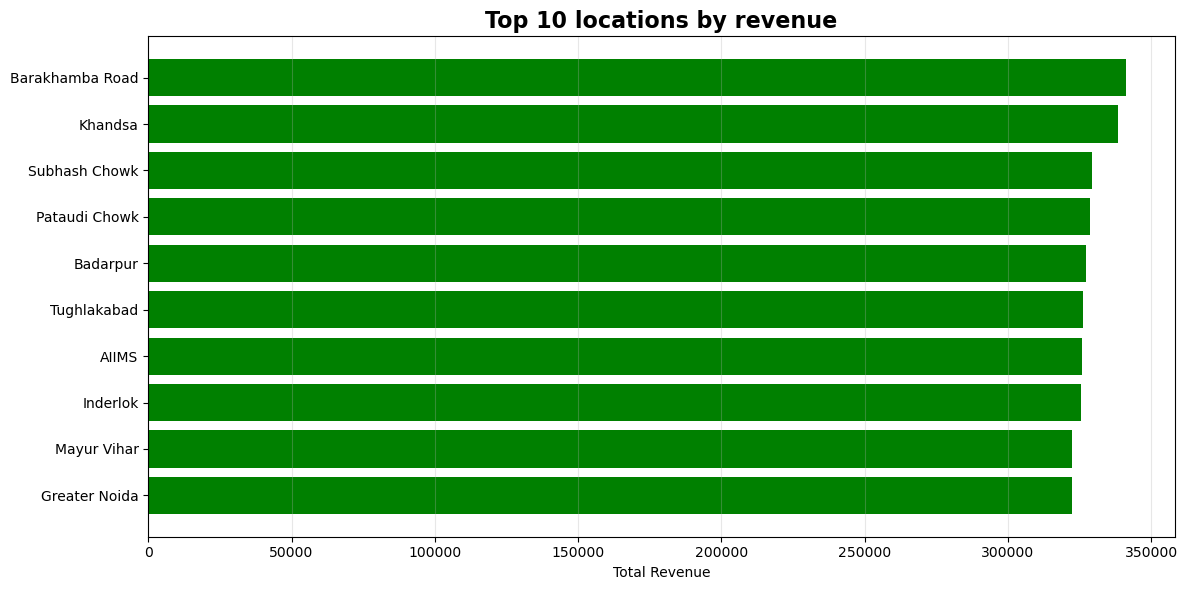

Vehicle by revenue type
               Total_Revenue  Avg_Booking  Num_Rides  Avg_Distance
Vehicle Type                                                      
Auto              12878422.0       506.73      25415         24.62
Go Mini           10338496.0       507.68      20364         24.61
Go Sedan           9369719.0       511.50      18318         24.61
Bike               7837697.0       510.20      15362         24.65
Premier Sedan      6275332.0       509.57      12315         24.60
eBike              3618485.0       503.90       7181         24.99
Uber XL            1528032.0       501.82       3045         24.40


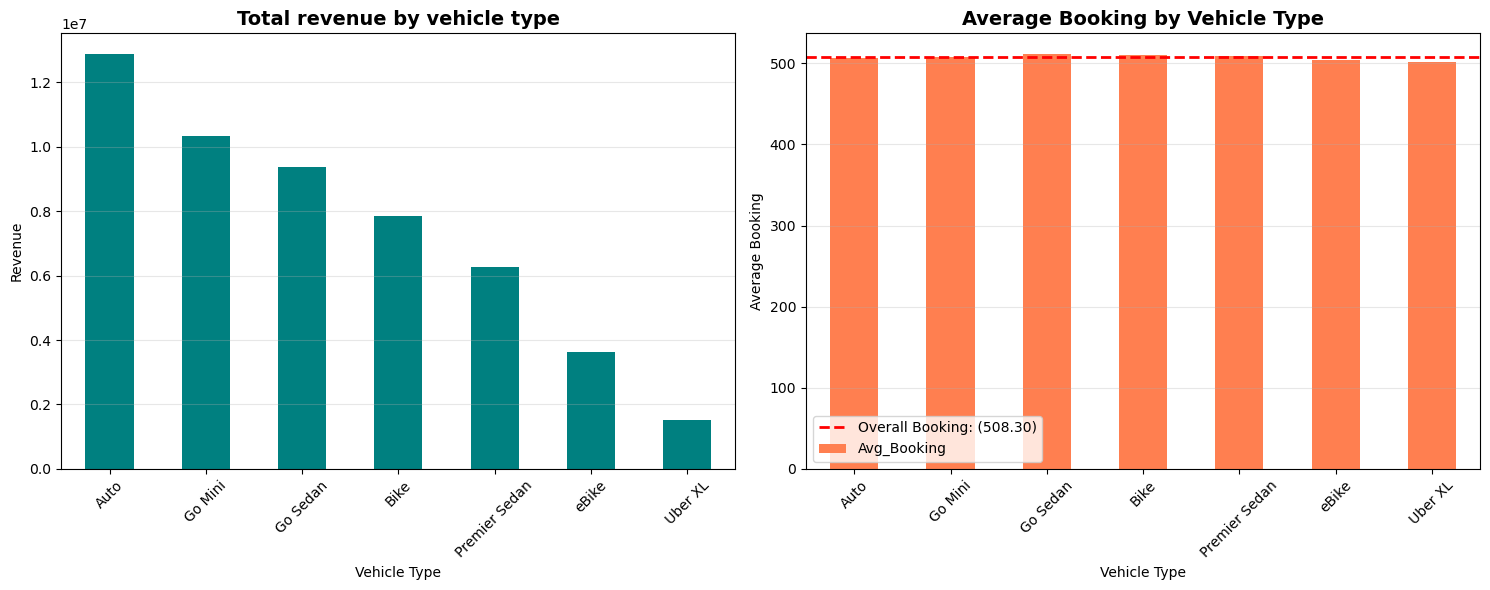

Revenue by Hour
            sum        mean  count
Hour                              
0      477304.0  507.770213    940
1      467167.0  515.636865    906
2      475840.0  508.919786    935
3      469813.0  505.719053    929
4      454992.0  508.939597    894
5      930721.0  499.581857   1863
6     1471059.0  516.704953   2847
7     1851902.0  503.097528   3681
8     2394391.0  512.717559   4670
9     2891944.0  516.880071   5595
10    3342593.0  510.709396   6545
11    2905343.0  503.438399   5771
12    2424257.0  511.015388   4744
13    1858436.0  500.117330   3716
14    2389385.0  505.048616   4731
15    2818707.0  507.966661   5549
16    3323600.0  505.490494   6575
17    3857680.0  511.221839   7546
18    4268079.0  510.535766   8360
19    3714520.0  497.858196   7461
20    3339546.0  506.913479   6588
21    2887604.0  514.999822   5607
22    1857020.0  506.690314   3665
23     974280.0  517.683316   1882


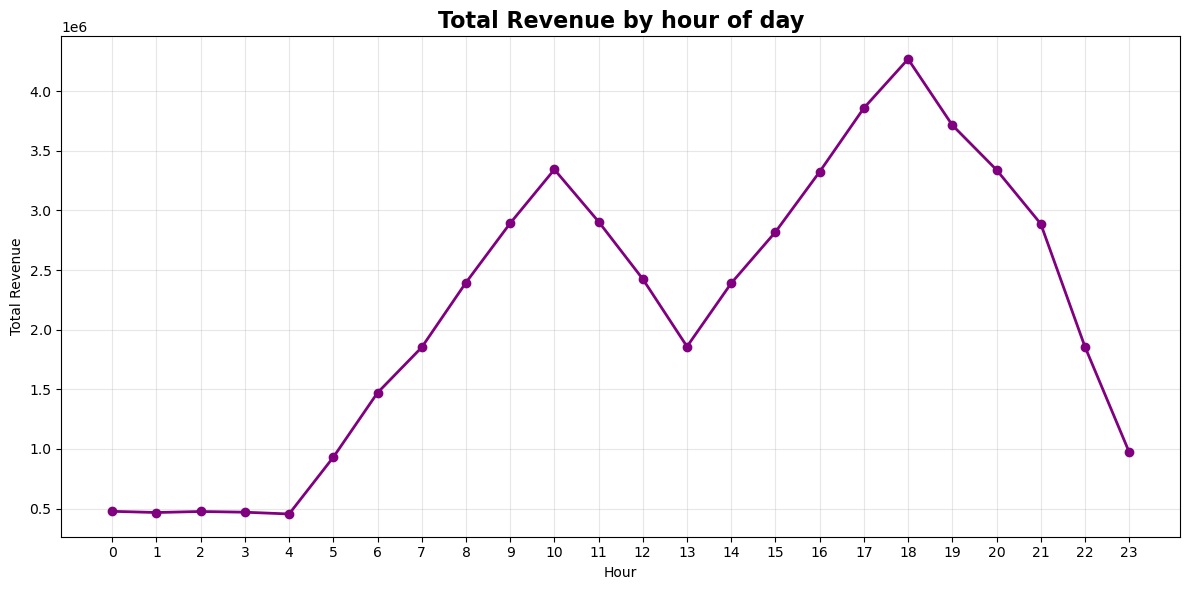

In [9]:
#======================================================
# SESSION 3: EXPLORATORY DATA ANALYSIS
#======================================================

#1. REVENUE ANALYSIS

#Top locations by revenue
revenue_by_location = df.groupby('Pickup Location')['Booking Value'].agg([
    ('Total_Revenue', 'sum'),
    ('Avg_Booking', 'mean'),
    ('Num_Rides','count')
]).sort_values('Total_Revenue', ascending = False)

print("Top 10 revenue locations:")
print(revenue_by_location.head(10))

#Visualize the top 10 pickup locations
plt.figure(figsize=(12,6))
top_10 = revenue_by_location.head(10)
plt.barh(
    range(len(top_10)),
    top_10['Total_Revenue'],
    color ='green'
)
plt.yticks(range(len(top_10)), top_10.index)
plt.xlabel('Total Revenue')
plt.title('Top 10 locations by revenue', fontsize = 16, fontweight ='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

#Revenue by vehicle type
vehicle_revenue = df.groupby('Vehicle Type').agg({
    'Booking Value': ['sum', 'mean', 'count'],
    'Ride Distance': 'mean'
}).round(2)

vehicle_revenue.columns = ['Total_Revenue', 'Avg_Booking', 'Num_Rides', 'Avg_Distance']
vehicle_revenue = vehicle_revenue.sort_values('Total_Revenue', ascending = False)
print('Vehicle by revenue type')
print(vehicle_revenue)

#Visualize
fig,axes = plt.subplots(1,2, figsize =(15,6))
vehicle_revenue['Total_Revenue'].plot(kind ='bar', ax = axes[0], color='teal')
axes[0].set_title('Total revenue by vehicle type', fontsize =14, fontweight ='bold')
axes[0].set_ylabel('Revenue')
axes[0].set_xlabel('Vehicle Type')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

vehicle_revenue['Avg_Booking'].plot(kind ='bar', ax = axes[1], color ='coral')
axes[1].set_title('Average Booking by Vehicle Type', fontsize =14, fontweight = 'bold')
axes[1].set_ylabel('Average Booking')
axes[1].set_xlabel('Vehicle Type')
axes[1].tick_params(axis='x', rotation =45)
axes[1].grid(True, alpha=0.3, axis ='y')

overall_avg_booking = df['Booking Value'].mean()
axes[1].axhline(
    overall_avg_booking,
    color = 'red',
    linewidth =2,
    linestyle ='--',
    label = f"Overall Booking: ({overall_avg_booking:.2f})"
)
axes[1].legend()
plt.tight_layout()
plt.show()

#Revenue by hour
hourly_revenue = df.groupby('Hour')['Booking Value'].agg(['sum', 'mean','count'])
print("Revenue by Hour")
print(hourly_revenue)

plt.figure(figsize = (12,6))
hourly_revenue['sum'].plot(kind= 'line', marker ='o', color='purple',linewidth=2)
plt.title('Total Revenue by hour of day', fontsize =16, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.grid(True, alpha=0.3)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

## Cancellation analysis

Total Rides: 150,000
Completed: 103,500 (69.00%)
Cancelled by Customer: 10,500 (7.00%)
Cancelled by Driver: 27,000 (18.00%)

 Top customer cancellation reasons
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


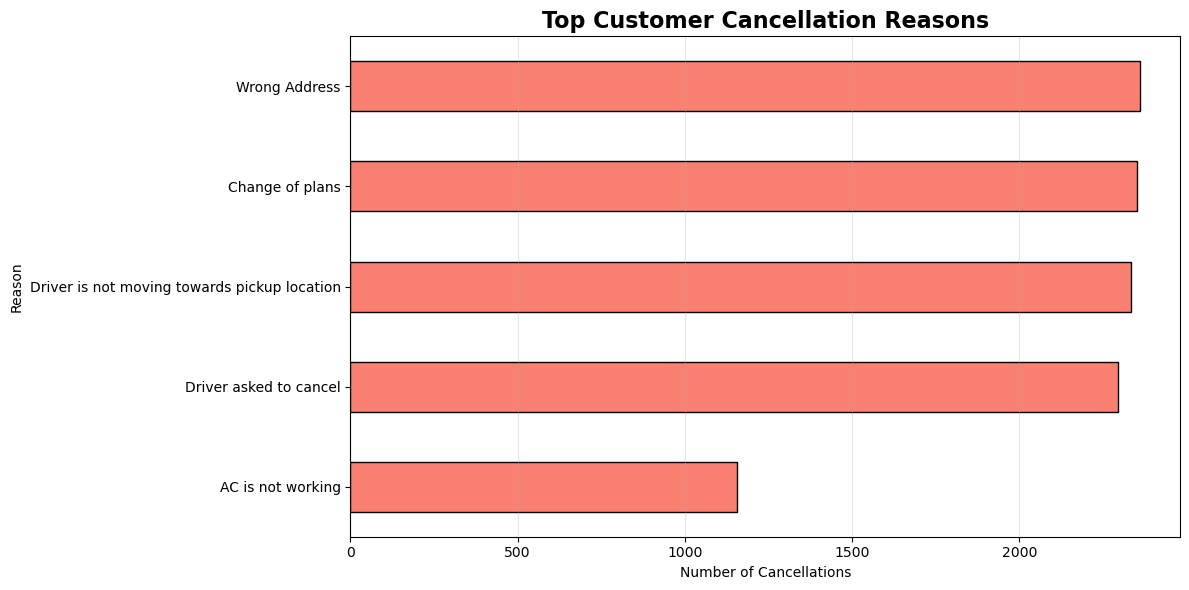


 Top driver cancellation reasons
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

 Top 10 locations by cancellation
Pickup Location
Saket             249
Akshardham        248
Pragati Maidan    248
Nehru Place       244
Vinobapuri        244
Shivaji Park      243
GTB Nagar         242
Kadarpur          238
Rajiv Nagar       236
Keshav Puram      236
Name: Ride_Outcome, dtype: int64


In [15]:
#Overall cancellation rate

total_rides = len(df)
completed = len(df[df['Ride_Outcome'] == 'Completed'])
cancelled_customer= len(df[df['Ride_Outcome'] == 'Cancelled by Customer'])
cancelled_driver  = len(df[df['Ride_Outcome'] == 'Cancelled by Driver'])

print(f'Total Rides: {total_rides:,}')
print(f'Completed: {completed:,} ({completed/total_rides*100:.2f}%)')
print(f'Cancelled by Customer: {cancelled_customer:,} ({cancelled_customer/ total_rides *100:.2f}%)')
print(f'Cancelled by Driver: {cancelled_driver:,} ({cancelled_driver/total_rides*100:.2f}%)')

#Why customers cancel
customer_cancellations = df[df['Ride_Outcome'] == 'Cancelled by Customer']
cancel_reasons = customer_cancellations['Reason for cancelling by Customer'].value_counts()
print("\n Top customer cancellation reasons")
print(cancel_reasons)

plt.figure(figsize=(12, 6))
cancel_reasons.head(10).plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Top Customer Cancellation Reasons', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cancellations')
plt.ylabel('Reason')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Why drivers cancel
driver_cancellations = df[df['Ride_Outcome'] == 'Cancelled by Driver']
driver_reasons = driver_cancellations['Driver Cancellation Reason'].value_counts()
print("\n Top driver cancellation reasons")
print(driver_reasons.head())

# Cancellation by location
cancellation_by_location = df.groupby('Pickup Location')['Ride_Outcome'].apply(
    lambda x: (x == 'Cancelled by Customer').sum() + (x == 'Cancelled by Driver').sum()
).sort_values(ascending = False)
print("\n Top 10 locations by cancellation")
print(cancellation_by_location.head(10))

## Time Based patterns


 Rides by day of week
             Total_Rides  Total_Revenue
Day_of_Week                            
Monday             21644      6414387.0
Tuesday            21391      6416890.0
Wednesday          21413      6578787.0
Thursday           21215      6557680.0
Friday             21397      6674597.0
Saturday           21542      9571155.0
Sunday             21398      9632687.0


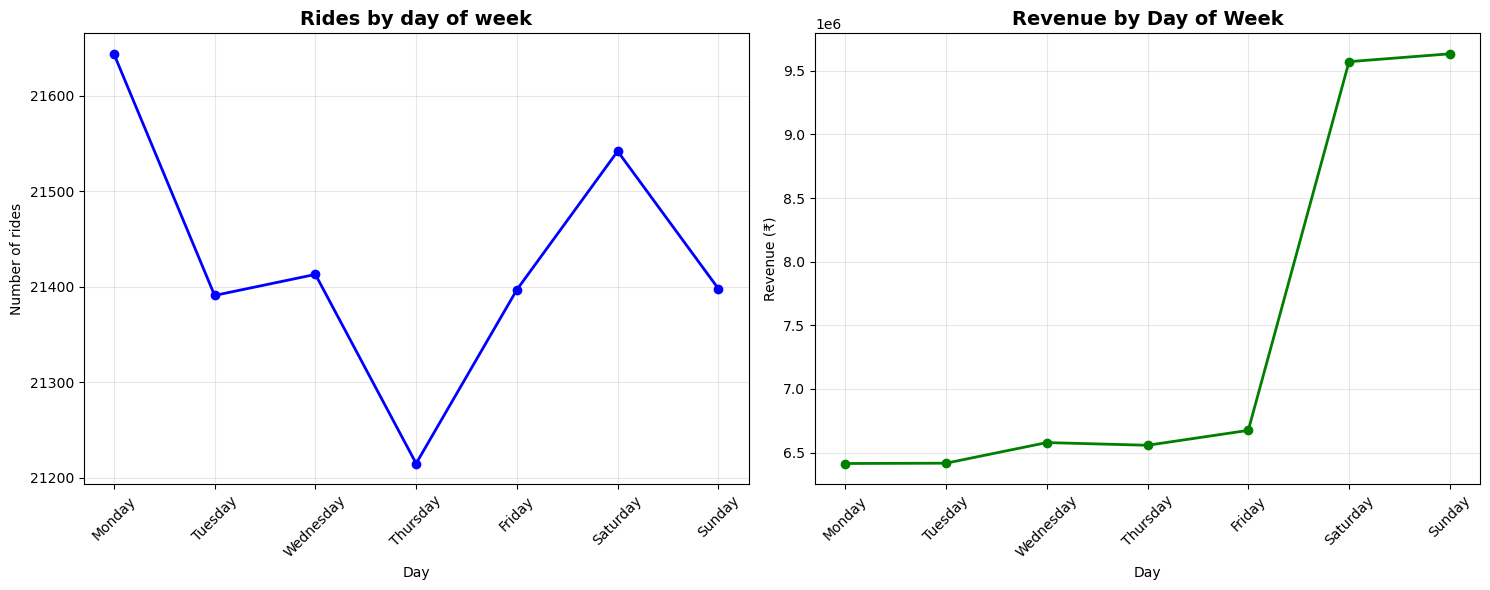


 Rides by Hour
Hour
0      1373
1      1360
2      1339
3      1383
4      1321
5      2786
6      4160
7      5450
8      6861
9      8234
10     9577
11     8390
12     7006
13     5470
14     7031
15     8202
16     9633
17    11044
18    12397
19    11047
20     9630
21     8103
22     5441
23     2762
dtype: int64


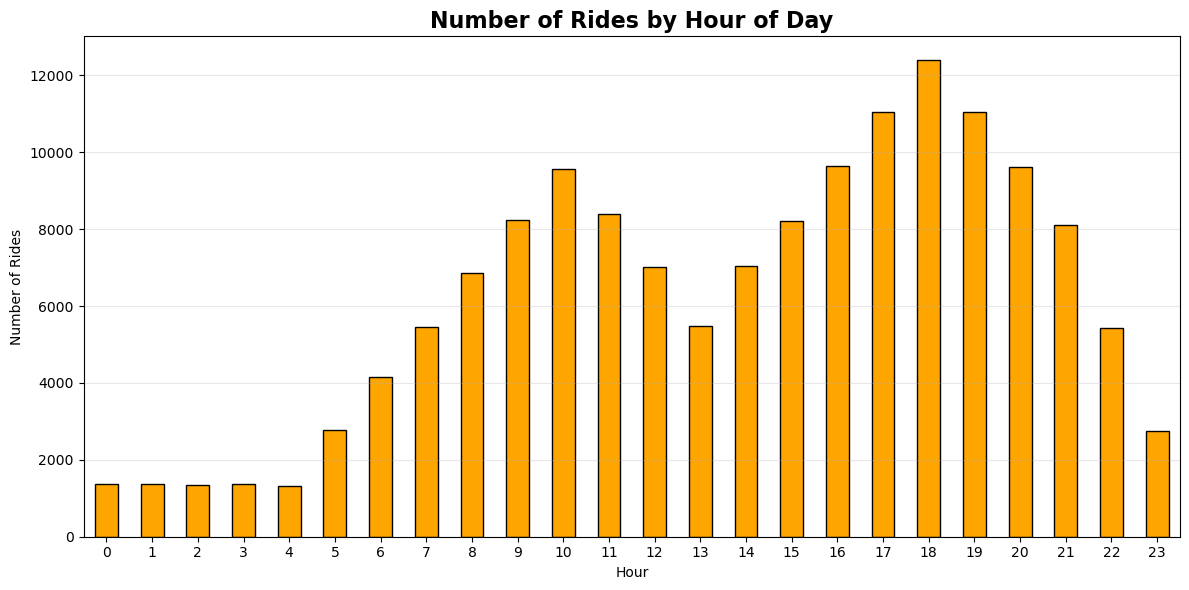


 Weekday vs Weekend
         Total_Rides  Total_Revenue  Avg_Booking
Weekday       107060     32642341.0   448.988212
Weekend        42940     19203842.0   655.465970


In [20]:
# Rides by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday']
rides_by_day = df.groupby('Day_of_Week').agg({
    'Booking ID':'count',
    'Booking Value':'sum'
})
rides_by_day.columns = ['Total_Rides','Total_Revenue']
rides_by_day = rides_by_day.reindex(day_order)

print("\n Rides by day of week")
print(rides_by_day)

fig,axes = plt.subplots(1,2, figsize = (15,6))

rides_by_day['Total_Rides'].plot(kind='line', marker='o', ax= axes[0], color = 'blue', linewidth = 2)
axes[0].set_title('Rides by day of week', fontsize =14, fontweight = 'bold')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Number of rides')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

rides_by_day['Total_Revenue'].plot(kind='line', marker='o', ax=axes[1], color='green', linewidth=2)
axes[1].set_title('Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Revenue (₹)')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Peak hours
rides_by_hour = df.groupby('Hour').size()
print("\n Rides by Hour")
print(rides_by_hour)

plt.figure(figsize = (12,6))
rides_by_hour.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Rides by Hour of Day', fontsize= 16, fontweight = 'bold')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(True, alpha= 0.3, axis ='y')
plt.tight_layout()
plt.show()

#Weekend vs Weekday
weekend_comparison = df.groupby('Is_Weekend').agg({
    'Booking ID':'count',
    'Booking Value': ['sum', 'mean']
})
weekend_comparison.columns = ['Total_Rides', 'Total_Revenue', 'Avg_Booking']
weekend_comparison.index = ['Weekday', 'Weekend']
print("\n Weekday vs Weekend")
print(weekend_comparison)

## Rating analysis


 Average ratings by vehicle type
               Driver Ratings  Customer Rating
Vehicle Type                                  
Auto                   4.2581           4.4394
Bike                   4.2564           4.4401
Go Mini                4.2550           4.4404
Go Sedan               4.2581           4.4447
Premier Sedan          4.2595           4.4400
Uber XL                4.2614           4.4405
eBike                  4.2538           4.4404


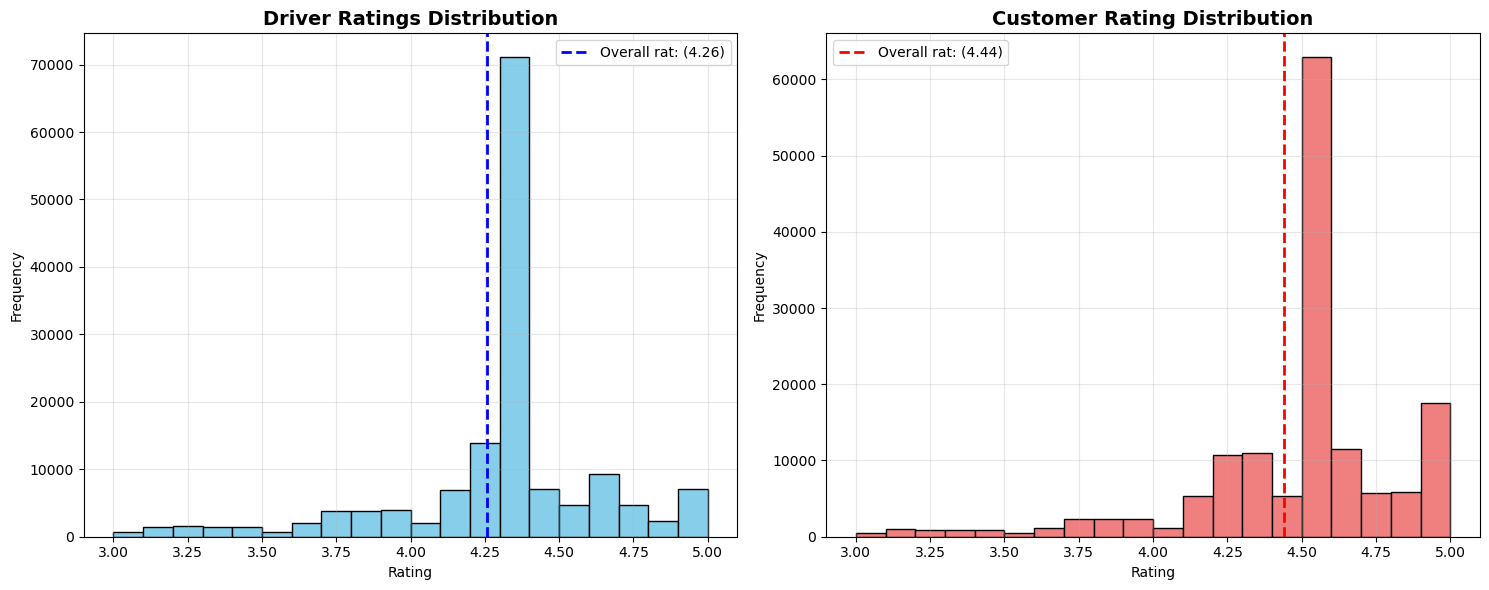


Correlation Matrix
                 Ride Distance  Driver Ratings  Customer Rating
Ride Distance         1.000000       -0.016436        -0.015975
Driver Ratings       -0.016436        1.000000         0.011907
Customer Rating      -0.015975        0.011907         1.000000


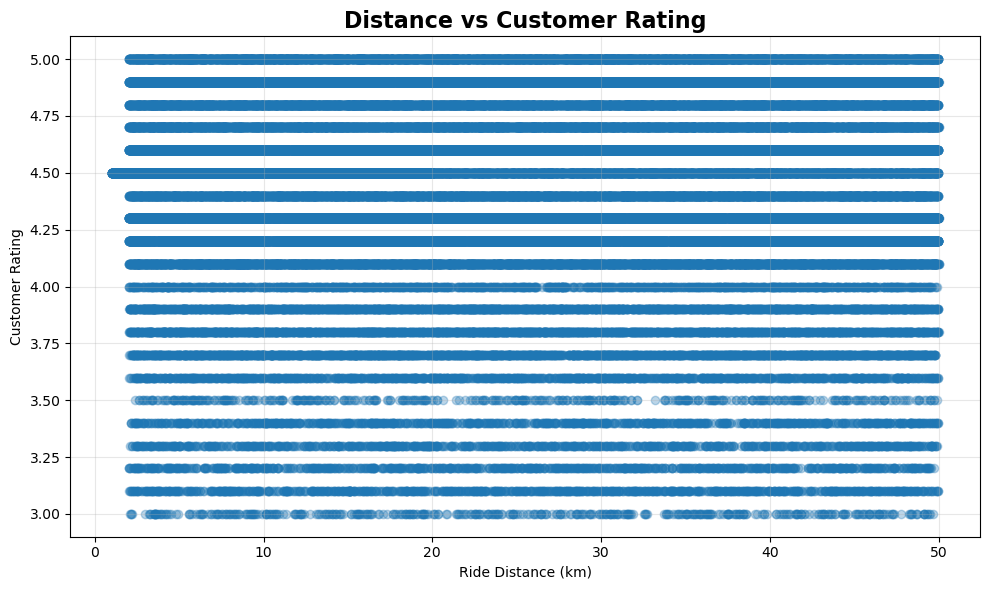

In [24]:
# Average ratings by vehicle type
rating_by_vehicle = df.groupby('Vehicle Type')[['Driver Ratings', 'Customer Rating']].mean().round(4)
print("\n Average ratings by vehicle type")
print(rating_by_vehicle)

# Ratings distribution
fig,axes = plt.subplots(1,2, figsize=(15,6))
df['Driver Ratings'].hist(
    bins =20, ax=axes[0],edgecolor ='black', color='skyblue')
axes[0].set_title('Driver Ratings Distribution', fontsize=14, fontweight ='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)
overall_rat_driver = df['Driver Ratings'].mean()
axes[0].axvline(
    overall_rat_driver,
    color='blue',
    linewidth = 2,
    linestyle ='--',
    label =f"Overall rat: ({overall_rat_driver:.2f})"
)
axes[0].legend()

df['Customer Rating'].hist(bins=20, ax=axes[1], edgecolor='black', color='lightcoral')
axes[1].set_title('Customer Rating Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)   
overall_rat_cust = df['Customer Rating'].mean()
axes[1].axvline(
    overall_rat_cust,
    color='red',
    linewidth = 2,
    linestyle ='--',
    label =f"Overall rat: ({overall_rat_cust:.2f})"
)
axes[1].legend()

plt.tight_layout()
plt.show()

#Correlation between distance and rating
correlation = df[['Ride Distance', 'Driver Ratings', 'Customer Rating']].corr()
print("\nCorrelation Matrix")
print(correlation)

#Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['Ride Distance'], df['Customer Rating'], alpha = 0.3)
plt.title('Distance vs Customer Rating', fontsize = 16, fontweight = 'bold')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Customer Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Geographic Insights


Top 10 Pickup Locations:
Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: count, dtype: int64


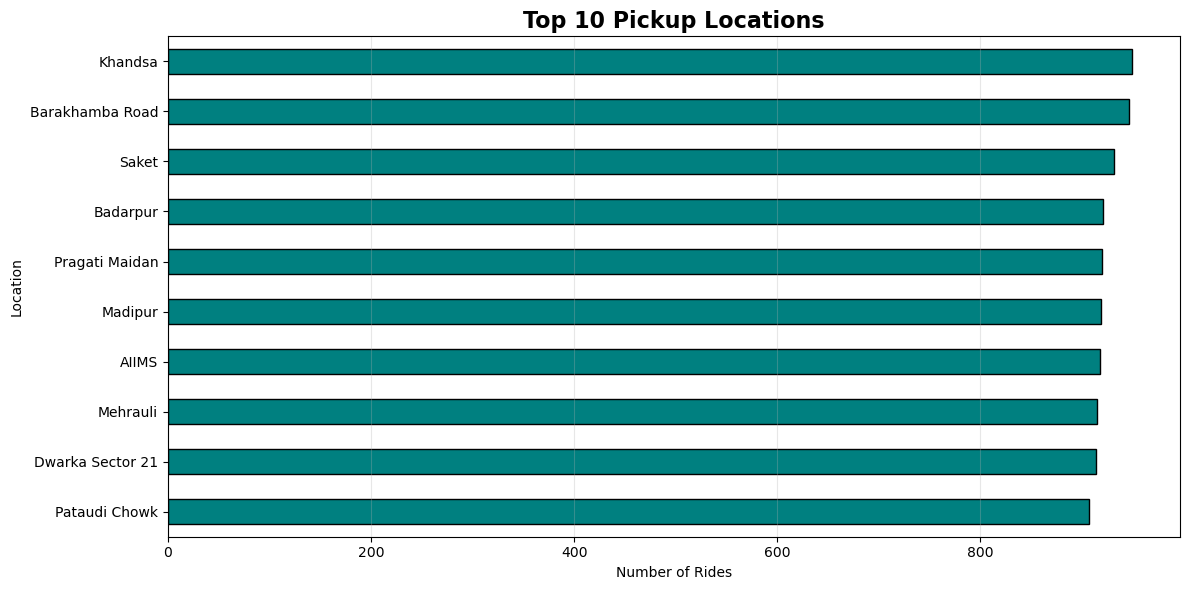


 Top 10 Routes
Route
DLF City Court -> Bhiwadi           17
Akshardham -> RK Puram              16
Janakpuri -> Faridabad Sector 15    16
Jor Bagh -> Rohini East             15
Vatika Chowk -> Rithala             15
Ghaziabad -> Badshahpur             15
Rithala -> Udyog Vihar Phase 4      15
Connaught Place -> Paharganj        14
Rohini West -> Sohna Road           14
South Extension -> Gwal Pahari      14
Name: count, dtype: int64

 Top 10 Locations by Average Distance:
                    mean   min    max
Pickup Location                      
Green Park         26.65  1.54  49.94
IGNOU Road         26.04  1.30  49.96
Qutub Minar        26.03  2.11  49.90
Anand Vihar ISBT   25.96  1.06  49.98
Sikanderpur        25.80  1.13  49.93
Shivaji Park       25.79  1.29  49.92
Sarojini Nagar     25.74  1.28  49.99
Samaypur Badli     25.70  1.12  49.98
Gurgaon Sector 29  25.66  1.06  49.79
Chanakyapuri       25.64  1.47  49.95


In [26]:
# Top pickup locations
top_pickups = df['Pickup Location'].value_counts().head(10)
print("\nTop 10 Pickup Locations:")
print(top_pickups)

plt.figure(figsize=(12, 6))
top_pickups.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Pickup Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Rides')
plt.ylabel('Location')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

#Most common routes
df['Route'] = df['Pickup Location'] + ' -> ' + df['Drop Location']
top_routes = df['Route'].value_counts().head(10)
print("\n Top 10 Routes")
print(top_routes)

# Distance by Location
distance_by_location = df.groupby('Pickup Location')['Ride Distance'].agg(['mean','min','max']).round(2)
distance_by_location =distance_by_location.sort_values('mean', ascending = False).head(10)
print("\n Top 10 Locations by Average Distance:")
print(distance_by_location)


# Do certain locations have higher cancellation rates?


## Payment method analysis

Payment Method Analysis:
                Num_Transactions  Total_Value  Avg_Value
Payment Method                                          
Cash                       25367   12895649.0     508.36
Credit Card                10209    5224025.0     511.71
Debit Card                  8239    4180510.0     507.41
UPI                        45909   23345101.0     508.51
Uber Wallet                12276    6200898.0     505.12


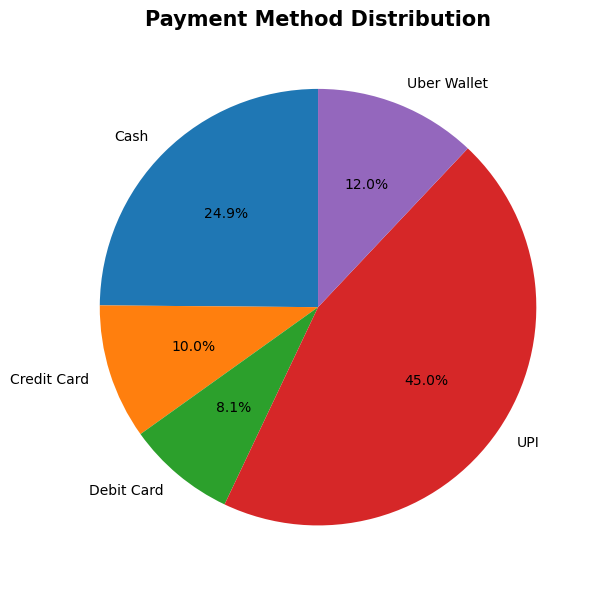

In [28]:
payment_analysis = df.groupby('Payment Method').agg({
    'Booking Value': ['count', 'sum', 'mean']
}).round(2)
payment_analysis.columns = ['Num_Transactions', 'Total_Value', 'Avg_Value']
print("Payment Method Analysis:")
print(payment_analysis)

plt.figure(figsize = (10,6))
payment_analysis['Num_Transactions'].plot(kind = 'pie', autopct ='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution', fontsize= 15, fontweight ='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()
                            


# ADVANCED ANALYSIS AND INSIGHTS

## EXECUTIVE SUMMARY DASHBOARD

In [35]:
print("=" * 60)
print("NCR RIDE BOOKINGS - EXECUTIVE SUMMARY")
print("=" * 60)

# Key Metrics
print(f"\n📊 KEY METRICS:")
print(f"Total Rides: {len(df):,}")
print(f"Total Revenue: ₹{df['Booking Value'].sum():,.2f}")
print(f"Average Booking Value: ₹{df['Booking Value'].mean():.2f}")
print(f"Completion Rate: {(df['Ride_Outcome']=='Completed').sum()/len(df)*100:.1f}%")
print(f"Unique Customers: {df['Customer ID'].nunique():,}")
print(f"Average Customer Rating: {df['Customer Rating'].mean():.2f}/5.0")
print(f"Average Driver Rating: {df['Driver Ratings'].mean():.2f}/5.0")

# Top Insights
print(f"\n🎯 TOP INSIGHTS:")
print(f"1. Busiest Day: {rides_by_day['Total_Rides'].idxmax()}")
print(f"2. Peak Hour: {rides_by_hour.idxmax()}:00")
print(f"3. Most Profitable Location: {revenue_by_location.index[0]}")
print(f"4. Most Popular Vehicle: {df['Vehicle Type'].value_counts().index[0]}")
print(f"5. Most Common Payment: {df['Payment Method'].value_counts().index[0]}")
print(f"6. Top Cancellation Reason: {cancel_reasons.index[0]}")

# Recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("1. Reduce driver wait times to decrease customer cancellations")
print("2. Increase driver availability during peak hours (7-9 AM, 5-8 PM)")
print(f"3. Focus marketing on top 5 profitable locations")
print("4. Investigate and address top 3 cancellation reasons")
print("5. Implement surge pricing during peak hours")
print("6. Improve driver-customer matching to reduce cancellations")

print("\n" + "=" * 60)

# 2. COMPARATIVE ANALYSIS

# Completed vs Cancelled rides
completed_rides = df[df['Ride_Outcome'] == 'Completed']
cancelled_rides = df[df['Ride_Outcome'].str.contains('Cancelled')]


print("\nCOMPLETED VS CANCELLED RIDES:")
print(f"Completed Rides: {len(completed_rides):,}")
print(f"  Avg Booking Value: ₹{completed_rides['Booking Value'].mean():.2f}")
print(f"  Avg Distance: {completed_rides['Ride Distance'].mean():.2f} km")
print(f"  Avg Rating: {completed_rides['Customer Rating'].mean():.2f}")

print(f"\nCancelled Rides: {len(cancelled_rides):,}")
print(f"  Avg Booking Value: ₹{cancelled_rides['Booking Value'].mean():.2f}")
print(f"  Avg Distance: {cancelled_rides['Ride Distance'].mean():.2f} km")

# 3. SAVE FINAL INSIGHTS
insights = {
    'Total_Rides': len(df),
    'Total_Revenue': df['Booking Value'].sum(),
    'Completion_Rate': (df['Ride_Outcome']=='Completed').sum()/len(df)*100,
    'Top_Location': revenue_by_location.index[0],
    'Peak_Hour': rides_by_hour.idxmax(),
    'Busiest_Day': rides_by_day['Total_Rides'].idxmax()
}

print("\n✅ Analysis Complete!")

NCR RIDE BOOKINGS - EXECUTIVE SUMMARY

📊 KEY METRICS:
Total Rides: 150,000
Total Revenue: ₹51,846,183.00
Average Booking Value: ₹508.30
Completion Rate: 69.0%
Unique Customers: 148,788
Average Customer Rating: 4.44/5.0
Average Driver Rating: 4.26/5.0

🎯 TOP INSIGHTS:
1. Busiest Day: Monday
2. Peak Hour: 18:00
3. Most Profitable Location: Barakhamba Road
4. Most Popular Vehicle: Auto
5. Most Common Payment: UPI
6. Top Cancellation Reason: Wrong Address

💡 RECOMMENDATIONS:
1. Reduce driver wait times to decrease customer cancellations
2. Increase driver availability during peak hours (7-9 AM, 5-8 PM)
3. Focus marketing on top 5 profitable locations
4. Investigate and address top 3 cancellation reasons
5. Implement surge pricing during peak hours
6. Improve driver-customer matching to reduce cancellations


COMPLETED VS CANCELLED RIDES:
Completed Rides: 103,500
  Avg Booking Value: ₹508.18
  Avg Distance: 26.00 km
  Avg Rating: 4.41

Cancelled Rides: 37,500
  Avg Booking Value: ₹nan
  Avg

# CLOSING: THE BIG PICTURE
# Synthesize Everything
"Okay team, let's connect the dots. From today's analysis, what would YOU recommend to the CEO?"
Guide them to:

Time Strategy: Deploy more drivers during 6-8 PM and 7-9 AM
Location Strategy: Focus on Barakhamba Road and top 5 profitable locations
Rating Improvement: Investigate why driver ratings are lower than customers
Payment Strategy: Encourage digital payments (if they have higher completion)
Weekend Marketing: Push longer leisure rides on weekends